In [6]:
%config IPCompleter.greedy=True

# Lesson-01 Assignment

   各位同学大家好，欢迎各位开始学习我们的人工智能课程。这门课程假设大家不具备机器学习和人工智能的知识，但是希望大家具备初级的Python编程能力。根据往期同学的实际反馈，我们课程的完结之后 能力能够超过80%的计算机人工智能/深度学习方向的硕士生的能力。

## 本次作业的内容

### 1. Recode all examples;

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img_ori = cv2.imread('lenna.jpg', 1)
img_gray = cv2.imread('lenna.jpg', 0)
img_ori.shape

(500, 500, 3)

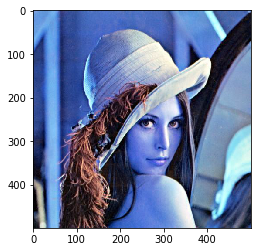

In [3]:
plt.imshow(img_ori)
plt.show()

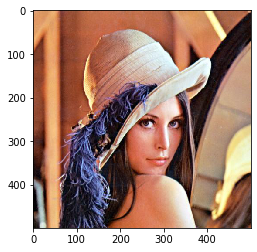

In [4]:
plt.imshow(cv2.cvtColor(img_ori, cv2.COLOR_BGR2RGB))
plt.show()

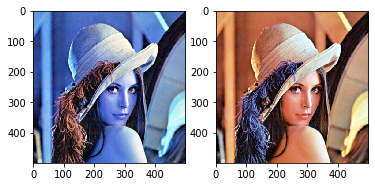

In [5]:
plt.subplot(121)
plt.imshow(img_ori)
plt.subplot(122)
plt.imshow(cv2.cvtColor(img_ori,cv2.COLOR_BGR2RGB))
plt.show()

In [6]:
def my_show(img, size=(2,2)):
    plt.figure(figsize=size)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

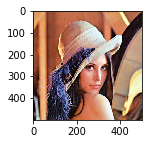

In [7]:
my_show(img_ori)

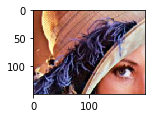

In [8]:
img_crop = img_ori[150:300, 100:300]
my_show(img_crop)

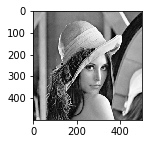

In [9]:
plt.figure(figsize=(2,2))
plt.imshow(img_gray,cmap='gray')
plt.show()

In [11]:
B,G,R = cv2.split(img_ori)
cv2.imshow('B', B)
cv2.imshow('G', G)
cv2.imshow('R', R)
key = cv2.waitKey()
cv2.destroyAllWindows()

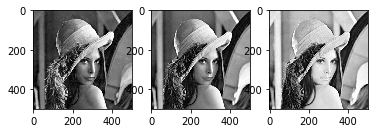

In [12]:
B,G,R = cv2.split(img_ori)
plt.subplot(131)
plt.imshow(B,cmap='gray')
plt.subplot(132)
plt.imshow(G,cmap='gray')
plt.subplot(133)
plt.imshow(R,cmap='gray')
plt.show()

In [13]:
def img_cooler(img,b_increase,r_decrease):
    B,G,R = cv2.split(img)
    b_lim = 255 - b_increase
    B[B > b_lim] = 255
    B[B <= b_lim] = (b_increase+B[B <= b_lim]).astype(img.dtype)
    r_lim = r_decrease
    R[R < r_lim] = 0
    R[R >= r_lim] = (R[R >= r_lim] - r_decrease).astype(img.dtype)
    return cv2.merge((B,G,R))

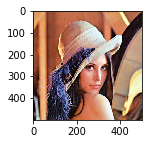

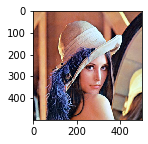

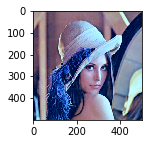

In [14]:
my_show(img_ori)
img_cool = img_cooler(img_ori,10,10)
my_show(img_cool)
img_cool = img_cooler(img_ori,50,50)
my_show(img_cool)

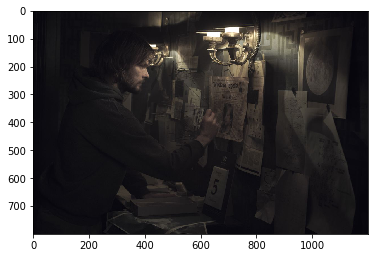

In [15]:
img_dark = cv2.imread('dark.jpg')
my_show(img_dark, size=(6,6))

In [16]:
def adjust_gamma(image, gamma=1.0):
    invGamma = 1.0/gamma
    table = []
    for i in range(256):
        table.append(((i / 255.0) ** invGamma) * 255)
    table = np.array(table).astype("uint8")
    return cv2.LUT(image, table)

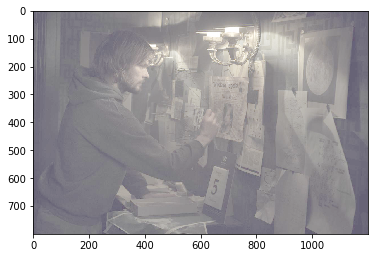

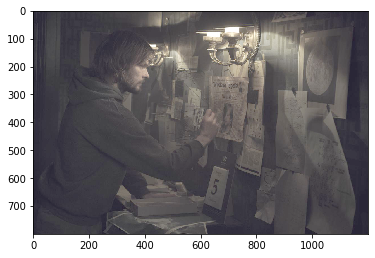

In [17]:
img_brighter = adjust_gamma(img_dark,4)
my_show(img_brighter,size=(6,6))
img_brighter = adjust_gamma(img_dark,2)
my_show(img_brighter,size=(6,6))

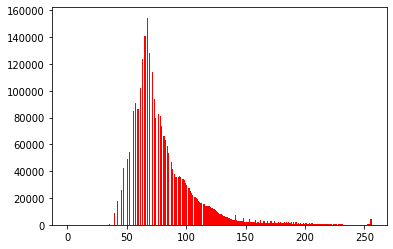

In [18]:
plt.hist(img_brighter.flatten(), 256, [0,256], color = 'r')
plt.show()

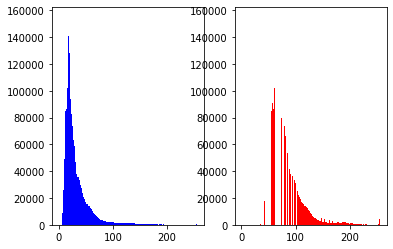

In [19]:
plt.subplot(121)
plt.hist(img_dark.flatten(), 256, [0,256], color = 'b')
plt.subplot(122)
plt.hist(img_brighter.flatten(), 256, [0, 256], color = 'r')
plt.show()

In [20]:
img_yuv = cv2.cvtColor(img_brighter, cv2.COLOR_BGR2YUV)
# Y channel
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
# Convert the yuv image back to RGB format
img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

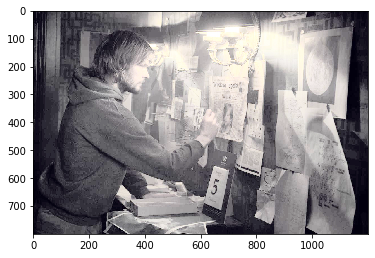

In [21]:
my_show(img_output, size=(6,6))

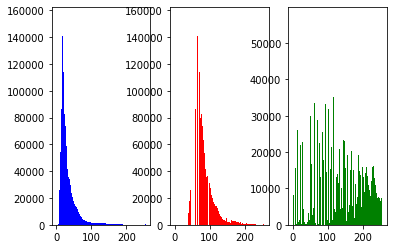

In [22]:
plt.subplot(131)
plt.hist(img_dark.flatten(), 256, [0, 256], color = 'b')
plt.subplot(132)
plt.hist(img_brighter.flatten(), 256, [0, 256], color = 'r')
plt.subplot(133)
plt.hist(img_output.flatten(), 256, [0, 256], color = 'g')
plt.show()

[[  0.8660254    0.5          8.49364958]
 [ -0.5          0.8660254  265.67332589]]


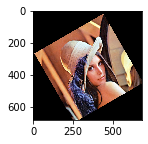

In [48]:
M = cv2.getRotationMatrix2D((img_ori.shape[1], img_ori.shape[0]*(1.1-3**0.5/2)), 30, 1) # center, angle, scale
print(M)
img_rotate = cv2.warpAffine(img_ori, M, (int(img_ori.shape[1]*(3**0.5/2+0.5)), int(img_ori.shape[0]*(3**0.5/2+0.5))))
my_show(img_rotate)

(500, 500, 3)
[[  0.501002    -0.1002004  100.        ]
 [  0.1002004    0.80160321  50.        ]]


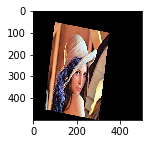

In [50]:
# Affine Transform
rows, cols, ch = img_ori.shape
print(img_ori.shape)
pts1 = np.float32([[0, 0], [cols - 1, 0], [0, rows - 1]])
pts2 = np.float32([[cols * 0.2, rows * 0.1], [cols * 0.7, rows * 0.2], [cols * 0.1, rows * 0.9]])
M = cv2.getAffineTransform(pts1, pts2)
print(M)
dst = cv2.warpAffine(img_ori, M, (cols, rows))
my_show(dst)

In [54]:
pts1 = np.float32([[0, 0], [0,500], [500, 0], [500, 500]])
pts2 = np.float32([[5, 19], [19, 460], [460, 9], [410, 420]])

M = cv2.getPerspectiveTransform(pts1, pts2)
print(M)
img_warp = cv2.warpPerspective(img_ori, M, (500, 500))

[[ 9.92840058e-01  3.46575006e-02  5.00000000e+00]
 [-1.83792163e-02  1.04318159e+00  1.90000000e+01]
 [ 1.80087082e-04  3.50394768e-04  1.00000000e+00]]


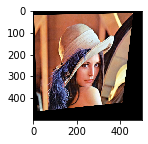

In [53]:
my_show(img_warp)

### 2. Please answer some questions about our course. We do appreciate your help.

   2.1  What do you want to get in this course? 

Answer:认识点同学、学习AI

2.2 What problems do you want to solve? 

Answer:我想学习如何细节地设计神经网络。

 2.3 What advantages do you have to accomplish your goal?

Answer:我已经学过部分人工智能算法基础，现在需要进阶训练和尝试。

 2.4 What disadvantages you need to overcome to accomplish your goal?

Answer:可能得到专业的AI调试、以及实践和应用方面还没有很熟练。

2.5 How will you plan to study in this course? 

Answer:计划尽力做好每一次课程学习，参与更多kaggle竞赛，认识更多同学。

### 3. 如何提交

答疑平台提交，具体方式，见作业提交指南

### 4. 作业截止时间

作业能帮助你回顾课堂内容，你又可以通过作业进行代码实操。咱们可要认真、及时的完成作业哦！自布置作业起两周内提交，助教及时批改作业哦～逾期提交不批改。（特殊情况，请找班主任请假。）

### 5. 完成以下问答和编程练习

5.1  Please combine **image crop, color shift, rotation and perspective transform** together to complete a data augmentation script.
   Your code need to be completed in Python/C++ in .py or .cpp file with comments and readme file to indicate how to use.

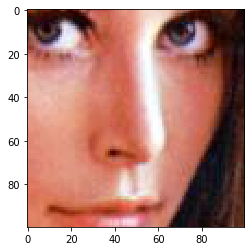

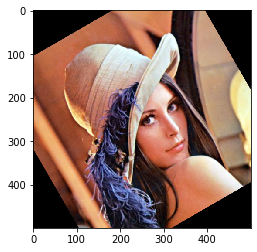

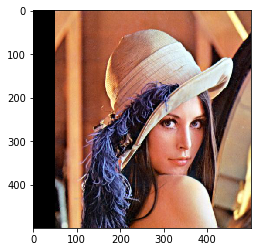

In [68]:
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt

img_ori = cv2.imread('lenna.jpg', 1)

def image_crop(img, x, y, width, length): # you code here
    return img[x:x+width, y:y+length]

def color_shift(): # you code here
    pass

def rotation(img, angle): # you code here
    M = cv2.getRotationMatrix2D((img.shape[1] / 2, img.shape[0] / 2), angle, 1)
    return cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))

def perspective_transform(img, pts1, pts2): # you code here
    M = cv2.getPerspectiveTransform(pts1, pts2)
    return cv2.warpPerspective(img, M, (img.shape[1], img.shape[0]))

img = image_crop(img_ori, 250, 250, 100, 100)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
img = rotation(img_ori, 30)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
pts1 = np.float32([[0, 0], [0, 500], [500, 0], [500, 500]])
pts2 = np.float32([[50, 0], [50, 500], [550, 0], [550, 500]])
img = perspective_transform(img_ori, pts1, pts2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

各位同学，你已经把课上关于图像增广实现了！CV的领域很广，咱们需要思考兴趣点在哪～

5.2  Do think about your own interests very carefully and choose your topic within 3 weeks.

Answer:

这次的作业就到这里了！祝大家学习进步！

![image alt <](http://5b0988e595225.cdn.sohucs.com/images/20190420/1d1070881fd540db817b2a3bdd967f37.gif)